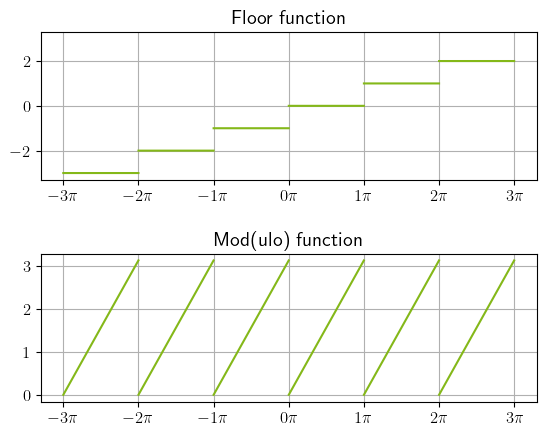

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# LaTeX in axis-labels
matplotlib.rcParams.update({'font.size': 12, 'text.usetex': True})

x = np.linspace(-3 * np.pi, 3 * np.pi, 10000)

fig, ax = plt.subplots(2, 1)

# Plot floor function
# This functions returns the indices at which the differences from adjacent values are non-zero
discontinuities_floor = np.where(np.diff(np.floor(x / np.pi)))[0]
start_idx = 0
for idx in discontinuities_floor:
    ax[0].plot(x[start_idx:idx+1], np.floor(x[start_idx:idx+1] / np.pi), color="#84B819")
    start_idx = idx + 1
ax[0].plot(x[start_idx:], np.floor(x[start_idx:] / np.pi), color="#84B819")

# Plot modulo function
discontinuities_mod = np.where(np.diff(x % np.pi) < 0)[0]
start_idx = 0
for idx in discontinuities_mod:
    ax[1].plot(x[start_idx:idx+1], x[start_idx:idx+1] % np.pi, color="#84B819")
    start_idx = idx + 1
ax[1].plot(x[start_idx:], x[start_idx:] % np.pi, color="#84B819")

# Set the ticks at multiples of pi for both subplots
pi_multiple = np.arange(-3 * np.pi, 4 * np.pi, np.pi)
pi_labels = [r'$%d\pi$' % i for i in range(-3, 4)]
ax[0].xaxis.set_ticks(pi_multiple)
ax[0].xaxis.set_ticklabels(pi_labels)
ax[1].xaxis.set_ticks(pi_multiple)
ax[1].xaxis.set_ticklabels(pi_labels)


ax[0].grid()
ax[1].grid()
ax[0].set_title('Floor function')
ax[1].set_title('Mod(ulo) function')

fig.subplots_adjust(hspace=.5)
fig.savefig('floorMod.pdf', dpi=300)


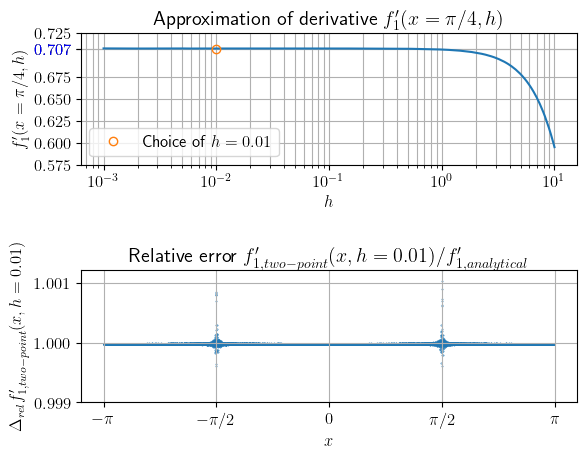

In [2]:
fig2, ax2 = plt.subplots(2, 1)

x_a = np.pi/2
df_1 = np.cos(x_a)
h, y = np.genfromtxt('a.txt', delimiter=',', skip_header=1, unpack=True)
xa, err = np.genfromtxt('a_error.txt', delimiter=',', skip_header=1, unpack=True)

ax2[0].set_title('Approximation of derivative $f_1\'(x=\pi/4, h)$')
ax2[0].set_xscale('log')
ax2[0].plot(h, y)
ax2[0].plot(0.01, 0.7066, 'o', markerfacecolor='none', label='Choice of $h=0.01$')
ax2[0].set_xlabel("$h$")
ax2[0].set_ylabel("$f_1\'(x=\pi/4, h)$")
ax2[0].grid(True, which='both')
ax2[0].legend()

# Add additional y-tick at 0.707107 with a blue color
current_yticks = ax2[0].get_yticks()
mask = np.abs(current_yticks - 0.7) > 1e-2  # Create a mask to filter out the 0.7 tick
filtered_yticks = np.append(current_yticks[mask], 0.707)
ax2[0].set_yticks(np.append(filtered_yticks, 0.707))
ax2[0].get_yticklabels()[-1].set_color("blue")

ax2[1].set_title('Relative error $f_{1, two-point}\'(x, h=0.01) / f_{1, analytical}\'$')
ax2[1].scatter(xa, err, s=0.1)
ax2[1].set_xlabel("$x$")
ax2[1].set_ylabel("$\Delta_{rel} f_{1, two-point}\'(x, h=0.01)$")

# Set the ticks at multiples of pi for both subplots
pi_multiple = np.arange(-np.pi, 3*np.pi/2, np.pi/2)
pi_labels = ["$-\pi$", "$-\pi/2$", "$0$", "$\pi/2$", "$\pi$"]
ax2[1].xaxis.set_ticks(pi_multiple)
ax2[1].xaxis.set_ticklabels(pi_labels)
ax2[1].set_ylim(0.999, np.max(err))
ax2[1].grid()

fig2.subplots_adjust(hspace=.8)
fig2.savefig('a.pdf', dpi=300)


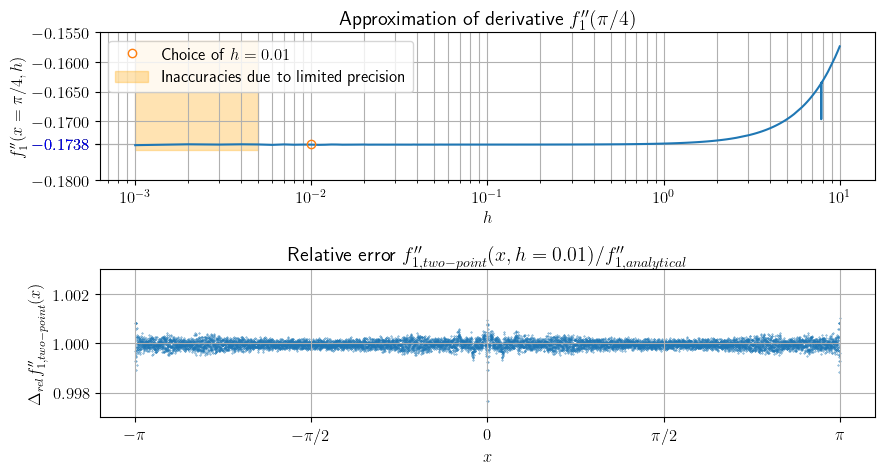

In [3]:
xb, ddf_err = np.genfromtxt("b_error.txt", delimiter=',', unpack=True)
h, y = np.genfromtxt('b.txt', delimiter=',', skip_header=1, unpack=True)

# Create the figure and the subplots
fig3, ax3 = plt.subplots(2, 1, figsize=(10,5))

ax3[1].scatter(xb, ddf_err, s=0.1)
ax3[1].set_title('Relative error $f_{1, two-point}\'\'(x, h=0.01) / f_{1, analytical}\'\'$')
ax3[1].set_xlabel("$x$")
ax3[1].set_ylabel("$\Delta_{rel} f_{1, two-point}\'\'(x)$")
ax3[1].set_xticks(pi_multiple)
ax3[1].set_xticklabels(pi_labels)
ax3[1].set_ylim(0.997, 1.003)
ax3[1].grid(True)

ax3[0].plot(h, y)
ax3[0].plot(0.01, -0.17384, 'o', markerfacecolor='none', label='Choice of $h=0.01$')
ax3[0].fill_between([h[0], 5e-3], ax3[0].get_ylim()[0], ax3[0].get_ylim()[1], label="Inaccuracies due to limited precision", color="orange", alpha=0.3)
ax3[0].set_title('Approximation of derivative $f_1\'\'(\pi/4)$')
ax3[0].set_xlabel("$h$")
ax3[0].set_ylabel("$f_1\'\'(x=\pi/4, h)$")
ax3[0].set_xscale('log')
ax3[0].legend()
ax3[0].grid(True, which='both')

# Add additional y-tick at -0.1738 with a blue color
current_yticks = ax3[0].get_yticks()
mask = np.abs(current_yticks + 0.175) > 1e-3  # Create a mask to filter out the -0.1738 tick
filtered_yticks = np.append(current_yticks[mask], -0.1738)
ax3[0].set_yticks(np.append(filtered_yticks, -0.1738))
ax3[0].get_yticklabels()[-1].set_color("blue")

fig3.subplots_adjust(hspace=.6)
plt.savefig("b.pdf", dpi=300)

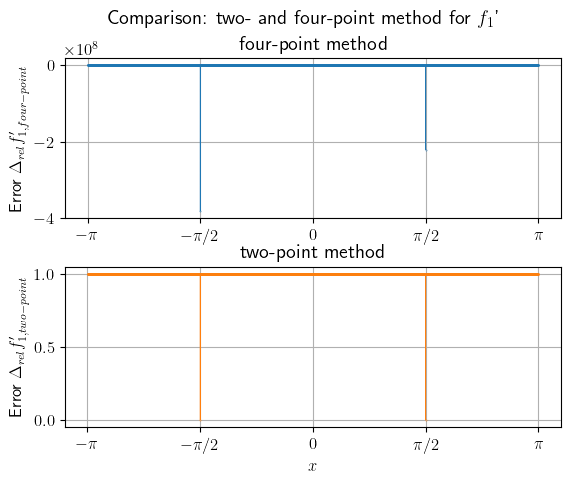

In [4]:
# Load data
xc, df_err4 = np.genfromtxt("c_error.txt", delimiter=',', unpack=True)

# Plotting
fig4, ax4 = plt.subplots(2,1)
fig4.suptitle("Comparison: two- and four-point method for $f_1$\'")
ax4[0].plot(xc, df_err4, label='$\Delta_{rel} f_{1, four-point}\'(x, h=0.01)$', marker='.', markersize=0.5, linewidth=0.5)
ax4[0].set_title('four-point method')
ax4[0].set_ylabel('Error $\Delta_{rel} f_{1, four-point}\'$')
ax4[0].set_xticks(pi_multiple)
ax4[0].set_xticklabels(pi_labels)
ax4[0].grid()

ax4[1].plot(xa, err, label='$\Delta_{rel} f_{1, two-point}\'(x, h=0.01)$', marker='.', markersize=0.5, linewidth=0.5, color="tab:orange")
ax4[1].set_title('two-point method')
ax4[1].set_xlabel('$x$')
ax4[1].set_ylabel('Error $\Delta_{rel} f_{1, two-point}\'$')
ax4[1].set_xticks(pi_multiple)
ax4[1].set_xticklabels(pi_labels)
ax4[1].grid()

fig4.subplots_adjust(hspace=.3)
plt.show()
fig4.savefig('c.pdf', dpi=300)
